Importation of modules and functions
===

In [50]:
# Modules
import csv
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sys
import datetime
import random
import warnings

# Functions
sys.path.insert(0, './implementations/')
from implementations import *
from preprocessing import *
from pca import *
from plot import *
from helpers import *

# Autoreload
%load_ext autoreload
%autoreload 2

# Set random seed
np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Training data loading
===

In [3]:
(labels_raw, data_raw, ids_raw) = load_csv_data("data/train.csv")

Data filtering and normalization 
===

In [15]:
# Splitting data
X_train, y_train, X_test, y_test = split_data(data_raw, labels_raw)

# Filtering missing values and outliers
X_train, X_test, y_train = process_data(X_train, X_test, y_train, ids_raw, sample_filtering = False, feature_filtering = False, replace = 'mean',remove_outlier = True)

# Standardization
# X_train, means, variance = standardize(X_train)
# X_test = standardize_test(X_test, means, variance)

# Build interaction terms
X_train_int = build_interact_terms(X_train)
X_test_int = build_interact_terms(X_test)

# Build polynomial of degree 2
X_train_poly = build_poly(X_train, 2)
X_test_poly = build_poly(X_test, 2)

# Combine polynomial and int term
data_train = np.c_[X_train_poly, X_train_int]
data_test = np.c_[X_test_poly, X_test_int]

# Perform PCA
eigVal, eigVec, sumEigVal = PCA(data_train, threshold = 0.9)
data = data_train.dot(eigVec)
data_t = data_test.dot(eigVec)
print("we have reduce the number of feature with PCA to {0}".format(eigVec.shape[1]))


The original dimensions of the training data set was 200000 samples and 30 columns
 After feature and sample filtering, there are 200000 samples and 30 columns
we have reduce the number of feature with PCA to 185


Build data into matrix form
===

In [16]:
y, tx = build_model_data(data, y_train)
y_t, tx_t = build_model_data(data_t,y_test)

Logistic regression using Newton's method
===

25/75	 train acc : 0.80363 	 | test acc : 0.80164
50/75	 train acc : 0.817995 	 | test acc : 0.8154
75/75	 train acc : 0.818955 	 | test acc : 0.81664


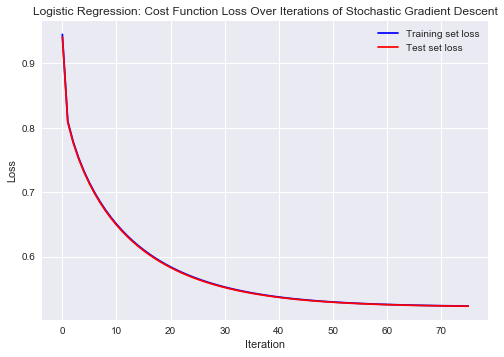

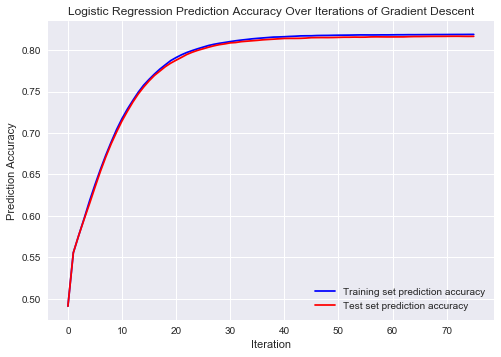

In [17]:
initial_w = np.ones(tx.shape[1])
losses, losses_t, acc, acc_t, w = logistic_hessian(y, tx, y_t, tx_t, initial_w, 0.07, 500, 75) # fit model, retrieve parameters 

plt.style.use('seaborn')
plt.plot(losses, label='Training set loss', c='blue')
plt.plot(losses_t, label='Test set loss', c='red')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Logistic Regression: Cost Function Loss Over Iterations of Stochastic Gradient Descent')
plt.legend()
plt.show()

# Make plot with label prediction accuracy

plt.plot(acc, label='Training set prediction accuracy', c='blue')
plt.plot(acc_t, label='Test set prediction accuracy', c='red')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('Prediction Accuracy')
plt.title('Logistic Regression Prediction Accuracy Over Iterations of Gradient Descent')
plt.show()

Grid search for best paramaters
===

In [ ]:
num_iter = 200
lr = 0.07
lam = np.logspace(-5,5,10)

initial_w = np.random.rand(tx.shape[1])

for j in range(len(lam)):
    print("Learning rate : {0} ¦ ".format(lr) + "Lambda : {0}".format(lam[j]))
    loss_tr, loss_ts, acc_tr, acc_ts, w = logistic_hessian(y, tx, y_t, tx_t, initial_w, gamma=lr, lam=lam[j], max_iters=75) 

    titre = "learning rate "+str(lr) + " lambda " + str(lam[j])
    plt.show(plotCurves(loss_tr, acc_tr, loss_ts, acc_ts, titre))




Kaggle 
====

Testing data loading
===

In [4]:
(labels_t, data_raw_t, ids_t) = load_csv_data("data/test.csv")

Data filtering and normalization (both datasets entirely)
===

In [75]:
# Filtering missing values and outliers
data_tr, data_ts, y_tr = process_data(data_raw, data_raw_t, labels_raw, ids_raw, sample_filtering = False, feature_filtering = False, replace = 'median',remove_outlier = True)

# # Standardization
# data_tr, means, variance = standardize(data_tr)
# data_ts = standardize_test(data_ts, means, variance)

# Build interaction terms
data_tr_int = build_interact_terms(data_tr)
data_ts_int = build_interact_terms(data_ts)

# Build polynomial of degree 3
data_tr_poly = build_poly(data_tr, 4)
data_ts_poly = build_poly(data_ts, 4)

# Build log 
data_tr_log = np.log(abs(data_tr)+1)
data_ts_log = np.log(abs(data_ts)+1)

# data_tr_1_ = 1./data_tr_poly
# data_ts_1_ = 1./data_ts_poly

# Combine polynomial and int term
data_train = np.c_[data_tr_poly, data_tr_int, data_tr_log]
data_test = np.c_[data_ts_poly, data_ts_int, data_ts_log]

# Perform PCA
eigVal, eigVec, sumEigVal = PCA(data_train, threshold = 0.999999)
data = data_train.dot(eigVec)
data_t = data_test.dot(eigVec)
print("we have reduce the number of feature with PCA to {0}".format(eigVec.shape[1]))

The original dimensions of the training data set was 250000 samples and 30 columns
 After feature and sample filtering, there are 250000 samples and 30 columns
we have reduce the number of feature with PCA to 351


Build data into matrix form
===

In [76]:
y, tx = build_model_data(data, y_tr)
y_t, tx_t = build_model_data(data_t,labels_t)

Logistic regression using Newton's method
===

In [77]:
initial_w = np.zeros(tx.shape[1])
losses, losses_t, acc, acc_t, w = logistic_hessian(y, tx, y_t, tx_t, initial_w, 0.07, 500, 200) # fit model, retrieve parameters 

./implementations\implementations.py:372: ComplexWarning: Casting complex values to real discards the imaginary part
  sig[~idx] = np.exp(z[~idx]) / (1. + np.exp(z[~idx]))
./implementations\implementations.py:371: ComplexWarning: Casting complex values to real discards the imaginary part
  sig[idx] = 1. / (1 + np.exp(-z[idx]))


25/200	 train acc : 0.817532 	 | test acc : 0.3096220245742101
50/200	 train acc : 0.823232 	 | test acc : 0.3159996339561944
75/200	 train acc : 0.82418 	 | test acc : 0.3175271629141311


KeyboardInterrupt: 

Kaggle submission
===

In [71]:
pred_t = predict_labels_logistic(w, tx_t, 0.5)

name = "D4pred.csv"
create_csv_submission(ids_t, pred_t, name)

# This yields 0.82817 on Kaggle